# Raw CO2 datasets Exploratory Data Analysis and Processing
This notebook performs performs EDA and processing on raw CO2 emissions datasets contained in `..\data\raw\co2_emissions`.

## Step 0: Import and Read Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)
os.makedirs('../plots/single_eda', exist_ok=True)

In [3]:
df_co2_emissions_per_capita = pd.read_csv('../data/raw/co2_emissions/co2-emissions-per-capita.csv')
df_co2_emissions = pd.read_csv('../data/raw/co2_emissions/co2-emissions-by-region.csv')

 ---

## Step 1: Data Understanding
Inspect Dataframes using `info()`, `head()` and `describe()`

### 1.1 CO2 emissions per capita
Inspecting CO2 emissions per capita

In [4]:
df_co2_emissions_per_capita.info()

<class 'pandas.DataFrame'>
RangeIndex: 26509 entries, 0 to 26508
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Entity                    26509 non-null  str    
 1   Code                      23206 non-null  str    
 2   Year                      26509 non-null  int64  
 3   CO₂ emissions per capita  26509 non-null  float64
dtypes: float64(1), int64(1), str(2)
memory usage: 828.5 KB


In [5]:
df_co2_emissions_per_capita.head()

,Entity,Code,Year,CO₂ emissions per capita
0,Afghanistan,AFG,1949,0.001992
1,Afghanistan,AFG,1950,0.010837
2,Afghanistan,AFG,1951,0.011625
3,Afghanistan,AFG,1952,0.011468
4,Afghanistan,AFG,1953,0.013123


In [6]:
#df_co2_emissions_per_capita.describe()

In [7]:
df_co2_emissions_per_capita.isna().sum()

Entity                         0
Code                        3303
Year                           0
CO₂ emissions per capita       0
dtype: int64

In [8]:
print(df_co2_emissions_per_capita[df_co2_emissions_per_capita['Code'].isna()]['Entity'].unique())

<StringArray>
[                       'Africa',                          'Asia',
  'Asia (excl. China and India)',                        'Europe',
          'Europe (excl. EU-27)',          'Europe (excl. EU-28)',
           'European Union (27)',           'European Union (28)',
         'High-income countries',          'Low-income countries',
 'Lower-middle-income countries',                 'North America',
     'North America (excl. USA)',                       'Oceania',
                 'South America', 'Upper-middle-income countries']
Length: 16, dtype: str


Here we can see that the rows that doesn't have a 'Code' value, are geographical regions (as confirmed by ["CO₂ emissions per capita"](https://ourworldindata.org/explorers/co2?hideControls=false&Gas+or+Warming=CO%E2%82%82&Accounting=Production-based&Fuel+or+Land+Use+Change=All+fossil+emissions&Count=Per+capita&country=CHN~USA~IND~GBR~OWID_WRL) on the Our World in Data website). They'll be separated from the country datasets and treated differently.  

 ---
### 1.2 CO2 emissions
Inspecting CO2 emissions

In [9]:
df_co2_emissions.info()

<class 'pandas.DataFrame'>
RangeIndex: 29384 entries, 0 to 29383
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                29384 non-null  str    
 1   Code                  23714 non-null  str    
 2   Year                  29384 non-null  int64  
 3   Annual CO₂ emissions  29384 non-null  float64
dtypes: float64(1), int64(1), str(2)
memory usage: 918.4 KB


In [10]:
df_co2_emissions.head()

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [11]:
# df_co2_emissions.describe()

In [12]:
df_co2_emissions.isna().sum()

Entity                     0
Code                    5670
Year                       0
Annual CO₂ emissions       0
dtype: int64

In [13]:
print(df_co2_emissions[df_co2_emissions['Code'].isna()]['Entity'].unique())

<StringArray>
[                       'Africa',                  'Africa (GCP)',
                          'Asia',                    'Asia (GCP)',
  'Asia (excl. China and India)',         'Central America (GCP)',
                        'Europe',                  'Europe (GCP)',
          'Europe (excl. EU-27)',          'Europe (excl. EU-28)',
           'European Union (27)',           'European Union (28)',
         'High-income countries',        'International aviation',
        'International shipping',       'Kuwaiti Oil Fires (GCP)',
          'Low-income countries', 'Lower-middle-income countries',
             'Middle East (GCP)',                'Non-OECD (GCP)',
                 'North America',           'North America (GCP)',
     'North America (excl. USA)',                    'OECD (GCP)',
                       'Oceania',                 'Oceania (GCP)',
          'Ryukyu Islands (GCP)',                 'South America',
           'South America (GCP)', 'Upper-middle-

Again, the rows that doesn't have a 'Code' value, are geographical regions (as confirmed by ["CO₂ emissions per capita"](https://ourworldindata.org/explorers/co2?hideControls=false&Gas+or+Warming=CO%E2%82%82&Accounting=Production-based&Fuel+or+Land+Use+Change=All+fossil+emissions&Count=Per+capita&country=CHN~USA~IND~GBR~OWID_WRL) on the Our World in Data website). They'll be separated from the country datasets and treated differently.  

 ---
## Step 2: Data Preparation
- Dropping irrelevant columns / rows
- Renaming columns 
- Merging the two datasets (`df_co2_emissions_per_capita`, `df_co2_emissions`) into a single `df_co2_emissions_merged`

Eventually, three datasets are obtained from the latter, separating countries, continents and income range:
- `df_co2_emissions_countries`
- `df_co2_emissions_continents`
- `df_co2_emissions_income`


In [14]:
df_co2_emissions_per_capita = df_co2_emissions_per_capita.rename(columns={'CO₂ emissions per capita': 'CO2 emissions per capita'})
df_co2_emissions = df_co2_emissions.rename(columns={'Annual CO₂ emissions': 'CO2 emissions'})
df_co2_emissions_per_capita.columns
# df_co2_emissions.columns

Index(['Entity', 'Code', 'Year', 'CO2 emissions per capita'], dtype='str')

In [15]:
df_co2_emissions_merged = pd.merge(df_co2_emissions_per_capita, df_co2_emissions, 
                                   on=['Entity', 'Code', 'Year'], 
                                   how='outer')

In [16]:
df_co2_emissions_merged = df_co2_emissions_merged[df_co2_emissions_merged['Year'] > 1800]
df_co2_emissions_merged.head()

,Entity,Code,Year,CO2 emissions per capita,CO2 emissions
0,Afghanistan,AFG,1949,0.001992,14656.0
1,Afghanistan,AFG,1950,0.010837,84272.0
2,Afghanistan,AFG,1951,0.011625,91600.0
3,Afghanistan,AFG,1952,0.011468,91600.0
4,Afghanistan,AFG,1953,0.013123,106256.0


Countries dataset:

In [17]:
df_co2_emissions_countries = df_co2_emissions_merged[df_co2_emissions_merged['Code'].notna()]

In [18]:
df_co2_emissions_countries['Entity'].unique()

<StringArray>
[        'Afghanistan',             'Albania',             'Algeria',
             'Andorra',              'Angola',            'Anguilla',
          'Antarctica', 'Antigua and Barbuda',           'Argentina',
             'Armenia',
 ...
             'Uruguay',          'Uzbekistan',             'Vanuatu',
           'Venezuela',             'Vietnam',   'Wallis and Futuna',
               'World',               'Yemen',              'Zambia',
            'Zimbabwe']
Length: 217, dtype: str

Continents and Income datasets:

In [19]:

continents = ['Africa', 'Asia', 'Europe', 'North America','Oceania', 'South America']

income = ['High-income countries', 'Low-income countries',
          'Lower-middle-income countries', 'Upper-middle-income countries']

df_co2_emissions_continents = df_co2_emissions_merged[df_co2_emissions_merged['Entity'].isin(continents)]
df_co2_emissions_income = df_co2_emissions_merged[df_co2_emissions_merged['Entity'].isin(income)]

In [20]:
df_co2_emissions_continents.drop(columns=['Code'], inplace=True)
df_co2_emissions_continents.head()

,Entity,Year,CO2 emissions per capita,CO2 emissions
76,Africa,1884,0.000168,21984.0
77,Africa,1885,0.000279,36640.0
78,Africa,1886,0.000360,47632.0
79,Africa,1887,0.000358,47632.0
80,Africa,1888,0.000603,80608.0


In [21]:
df_co2_emissions_income.drop(columns=['Code'], inplace=True)
df_co2_emissions_income.head()

,Entity,Year,CO2 emissions per capita,CO2 emissions
12133,High-income countries,1801,0.143558,31986050.0
12134,High-income countries,1802,0.180012,40310470.0
12135,High-income countries,1803,0.131242,29538506.0
12136,High-income countries,1804,0.140437,31769178.0
12137,High-income countries,1805,0.137444,31251818.0


The `df_co2_emissions_merged` has been split into:
- `df_co2_emissions_countries`
- `df_co2_emissions_continents`
- `df_co2_emissions_income`

 ---
## Step 3: Feature Understanding
Plotting feature distributions using Time Series.
Below three plots are created:
- CO2 emissions Per Continent (using `df_co2_emissions_continents`)
- CO2 Emissions Per Capita Continent (using `df_co2_emissions_continents`)
- CO2 Emissions Per Capita Per Income Range (using `df_co2_emissions_income`)

### 3.1 CO2 emissions per Continent

In [22]:
df_co2_emissions_continents.columns

Index(['Entity', 'Year', 'CO2 emissions per capita', 'CO2 emissions'], dtype='str')

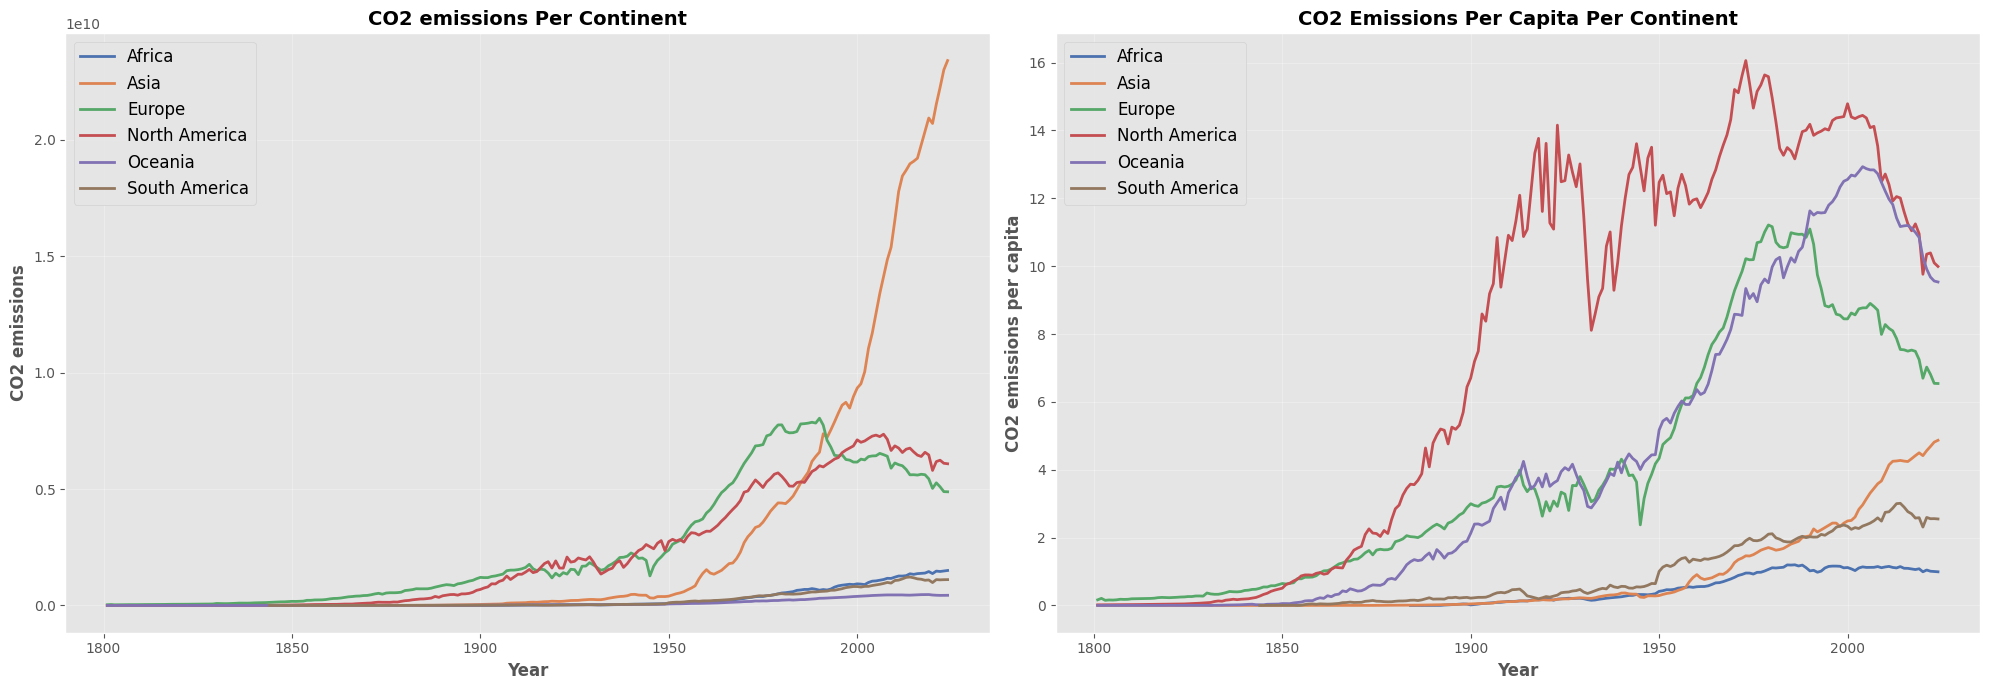

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

entities = df_co2_emissions_continents['Entity'].unique()
colors = sns.color_palette("deep", len(entities))

# CO2 emissions overtime by continent
for i, continent in enumerate(entities):
    data = df_co2_emissions_continents[df_co2_emissions_continents['Entity'] == continent]
    axes[0].plot(data['Year'], data['CO2 emissions'], label=continent, linewidth=2, color=colors[i])
axes[0].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[0].set_ylabel('CO2 emissions', fontsize=12, fontweight='bold')
axes[0].set_title('CO2 emissions Per Continent', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=12)
axes[0].grid(True, alpha=0.3)

# CO2 emissions per capita overtime by continent
for i, continent in enumerate(entities):
    data = df_co2_emissions_continents[df_co2_emissions_continents['Entity'] == continent]
    axes[1].plot(data['Year'], data['CO2 emissions per capita'], label=continent, linewidth=2, color=colors[i])
axes[1].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[1].set_ylabel('CO2 emissions per capita', fontsize=12, fontweight='bold')
axes[1].set_title('CO2 Emissions Per Capita Per Continent', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=12)
axes[1].grid(True, alpha=0.3)   
plt.tight_layout()
plt.savefig('../plots/single_eda/co2_continents.png', dpi=300, bbox_inches='tight')
plt.show()

### 3.2 CO2 Emissions Per Capita Per Income Range 

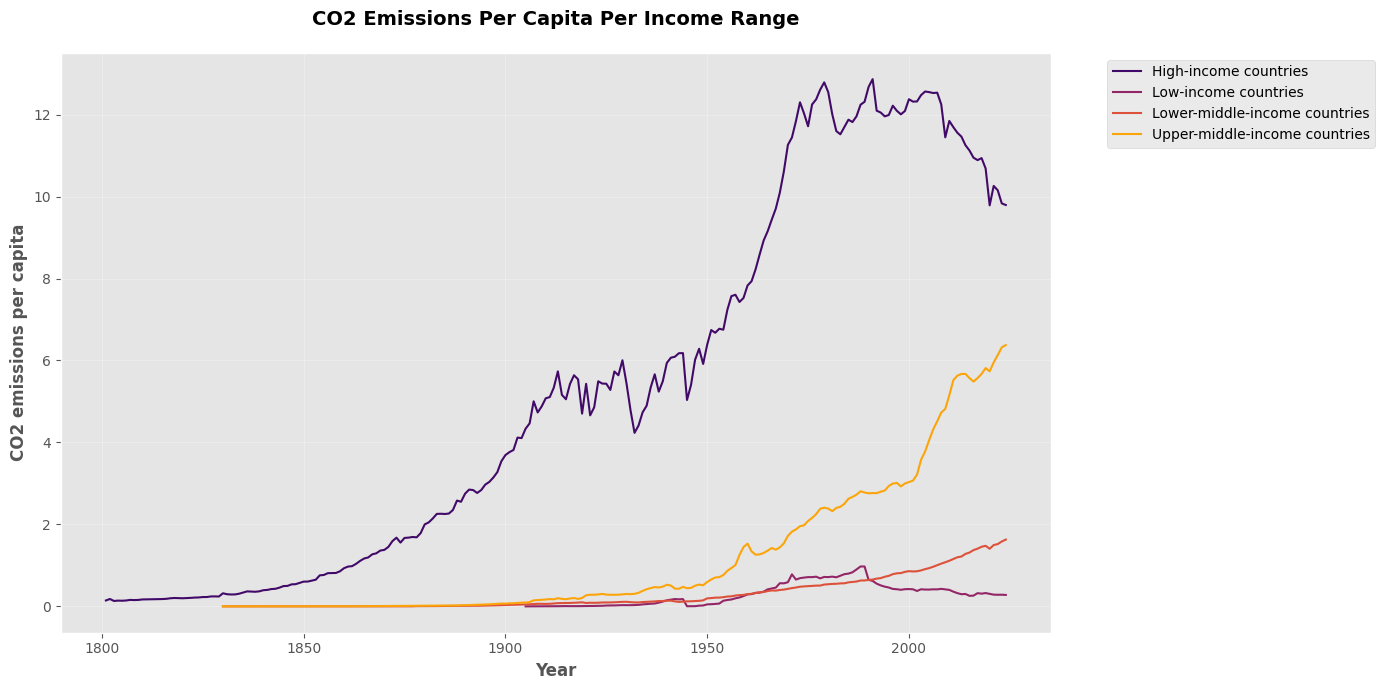

In [24]:
fig, ax = plt.subplots(figsize=(14, 7))
entities = df_co2_emissions_income['Entity'].unique()
colors = sns.color_palette("inferno", len(entities))
for i, income_group in enumerate(entities):
    data = df_co2_emissions_income[df_co2_emissions_income['Entity'] == income_group]
    ax.plot(data['Year'], data['CO2 emissions per capita'], label=income_group, color=colors[i])

ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('CO2 emissions per capita', fontsize=12, fontweight='bold')
ax.set_title('CO2 Emissions Per Capita Per Income Range', fontsize=14, fontweight='bold', pad=20)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True, fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../plots/single_eda/co2_pc_income_range.png', dpi=300, bbox_inches='tight')
plt.show()

 ---
## 4. Data Saving
Saving the DataFrames into `..\data\processed\`.
- `df_co2_emissions_countries` --> `..\data\processed\df_co2_emissions_countries.csv`
- `df_co2_emissions_continents` --> `..\data\processed\df_co2_emissions_continents.csv`

In [25]:

# df_co2_emissions.to_csv('../data/processed/co2_emissions.csv', index=False)
df_co2_emissions_countries.to_csv('../data/processed/co2_emissions_countries.csv', index=False)
df_co2_emissions_continents.to_csv('../data/processed/co2_emissions_continents.csv', index=False)